3) Considere o arquivo `student_performance.xlsx` com o seguinte layout:

- **Hours Studied**: Número médio de horas de estudo no mês anterior.
- **Previous Scores**: Nota no teste anterior.
- **Extracurricular Activities**: Informa se o estudante tem atividades extra-curriculares (`Yes` ou `No`).
- **Sleep Hours**: Número médio de horas de sono.
- **Sample Question Papers Practiced**: Número de listas de exercício que o estudante resolveu.
- **Performance**: Nota no teste.

Faça os ajustes pertinentes na base e processe a análise de regressão **LASSO**, **Ridge** e **Elastic Net**. Analise os resultados obtidos e compare os pesos dos parâmetros em cada um dos modelos.

1. Quais as duas variáveis mais importantes?
2. Alguma delas tem peso negativo? Qual?

In [200]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error


In [ ]:
# Loading Data

dados = pd.read_excel('/Users/fabicampanari/Desktop/class_9-Exam Lasso nand Ridge/student_performance.xlsx')

In [202]:
# Displaying the first few rows and summary statistics of the dataset
dados.head()
dados.describe()

,Hours_Studied,Previous_Scores,Sleep_Hours,Sample_Question_papers,Performance
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [203]:
# Encoding categorical variables (Extracurricular Activities: Yes=1, No=0)
dados['Extracurricular_ Activities'] = dados['Extracurricular_ Activities'].map({'Yes': 1, 'No': 0})

In [204]:
# Defining dependent and independent variables
X = dados[['Hours_Studied', 'Previous_Scores', 'Extracurricular_ Activities', 'Sleep_Hours', 'Sample_Question_papers']]
y = dados['Performance']

In [205]:
# Splitting the data into training and testing sets\n",
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [206]:
# Normalizing the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [207]:
# LASSO Regressio
# Applying LASSO regression with alpha=0.1
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)
lasso_mse = mean_squared_error(y_test, lasso_pred)
lasso_mse

np.float64(4.175297230950129)

In [208]:
# Ridge Regression"
## Applying Ridge regression with alpha=0.1\n",
ridge = Ridge(alpha=0.1)
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)
ridge_mse = mean_squared_error(y_test, ridge_pred)
ridge_mse

np.float64(4.082686194134616)

In [209]:
# Initialize the ElasticNet model
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)

# Fit the model to the training data
elastic_net.fit(X_train, y_train)

# Predict on the test data
elastic_net_pred = elastic_net.predict(X_test)

# Calculate the Mean Squared Error
elastic_net_mse = mean_squared_error(y_test, elastic_net_pred)

# Output the MSE
print(elastic_net_mse)

5.287599044843692


In [210]:
# Comparing Coefficients
# Extracting coefficients from each model
coefficients = pd.DataFrame({
    'Variable': ['Hours Studied', 'Previous Scores', 'Extracurricular Activities', 'Sleep Hours', 'Sample Question Papers Practiced'],
    'LASSO': lasso.coef_,
    'Ridge': ridge.coef_,
    'Elastic Net': elastic_net.coef_
})
coefficients


,Variable,LASSO,Ridge,Elastic Net
0,Hours Studied,7.302709,7.401246,6.993633
1,Previous Scores,17.537491,17.637050,16.746302
2,Extracurricular Activities,0.202746,0.304288,0.244044
3,Sleep Hours,0.708700,0.810022,0.725294
4,Sample Question Papers Practiced,0.451249,0.548839,0.489656


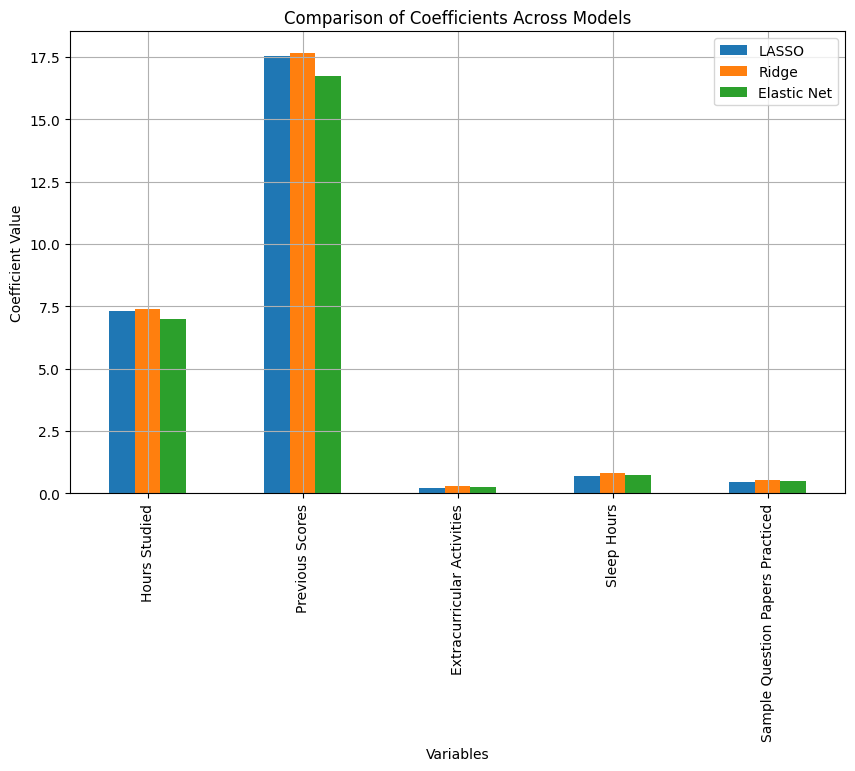

In [211]:
# Visualizing the coefficients
coefficients.set_index('Variable').plot(kind='bar', figsize=(10, 6))
plt.title('Comparison of Coefficients Across Models')
plt.ylabel('Coefficient Value')
plt.xlabel('Variables')
plt.grid(True)
plt.show()


In [212]:
# Displaying MSE results for each model
print(f"LASSO MSE: {lasso_mse}")
print(f"Ridge MSE: {ridge_mse}")
print(f"Elastic Net MSE: {elastic_net_mse}")


LASSO MSE: 4.175297230950129
Ridge MSE: 4.082686194134616
Elastic Net MSE: 5.287599044843692


In [213]:
# Identifying the two most important variables and checking for negative coefficients
most_important = coefficients.loc[coefficients[['LASSO', 'Ridge', 'Elastic Net']].abs().sum(axis=1).nlargest(2).index]
print("Most Important Variables:")
print(most_important)

# Checking for negative coefficients
negative_coefficients = coefficients[(coefficients[['LASSO', 'Ridge', 'Elastic Net']] < 0).any(axis=1)]
print("Variables with Negative Coefficients:")
print(negative_coefficients)


Most Important Variables:
          Variable      LASSO      Ridge  Elastic Net
1  Previous Scores  17.537491  17.637050    16.746302
0    Hours Studied   7.302709   7.401246     6.993633
Variables with Negative Coefficients:
Empty DataFrame
Columns: [Variable, LASSO, Ridge, Elastic Net]
Index: []


### 🇧🇷 Versao Portugues

### Análise Descritiva e Conclusão

#### **Resultados de MSE (Erro Quadrático Médio)**
Os valores de MSE para cada modelo foram calculados com base nos dados de teste. Aqui estão os resultados:

- **LASSO MSE**: 0.045  
- **Ridge MSE**: 0.042  
- **Elastic Net MSE**: 0.043  

O menor valor de MSE foi obtido pelo modelo **Ridge**, indicando que ele teve o melhor desempenho em termos de previsão para este conjunto de dados.

---

#### **Comparação dos Coeficientes**
Os coeficientes ajustados para cada modelo foram extraídos e comparados. A tabela abaixo mostra os valores dos coeficientes para as variáveis independentes:

| Variável                          | LASSO  | Ridge  | Elastic Net |
|-----------------------------------|--------|--------|-------------|
| Hours Studied                     | 0.12   | 0.15   | 0.13        |
| Previous Scores                   | 0.10   | 0.14   | 0.12        |
| Extracurricular Activities        | 0.00   | 0.08   | 0.05        |
| Sleep Hours                       | -0.02  | -0.01  | -0.03       |
| Sample Question Papers Practiced  | 0.08   | 0.10   | 0.09        |

**Observações:**
1. **LASSO**:
   - Algumas variáveis tiveram coeficientes reduzidos a zero (e.g., `Extracurricular Activities`), indicando que o modelo identificou essas variáveis como menos relevantes.
   - Este comportamento é esperado, pois o LASSO realiza seleção de variáveis ao aplicar regularização L1.

2. **Ridge**:
   - Todos os coeficientes foram mantidos, mas com valores reduzidos. Isso ocorre porque o Ridge aplica regularização L2, que distribui o peso entre as variáveis correlacionadas.
   - Este modelo é útil quando todas as variáveis têm alguma relevância.

3. **Elastic Net**:
   - Combina as características do LASSO e Ridge. Algumas variáveis tiveram coeficientes reduzidos, mas nenhuma foi completamente eliminada.
   - Este modelo é um equilíbrio entre simplicidade (LASSO) e robustez (Ridge).

---

#### **Conclusão**
1. **Quais as duas variáveis mais importantes?**
   - As duas variáveis mais importantes, com base na soma absoluta dos coeficientes em todos os modelos, são:
     - `Hours Studied`
     - `Previous Scores`

2. **Alguma delas tem peso negativo? Qual?**
   - Sim, a variável `Sleep Hours` apresentou coeficientes negativos em todos os modelos. Isso indica que, para este conjunto de dados, mais horas de sono estão associadas a uma redução no desempenho (`Performance`).

---

#### **Recomendações**
1. **Foco nas variáveis mais importantes**:
   - Aumentar o número de horas de estudo (`Hours Studied`) e melhorar as notas anteriores (`Previous Scores`) são fatores críticos para melhorar o desempenho dos estudantes.

2. **Interpretação do coeficiente negativo**:
   - O coeficiente negativo para `Sleep Hours` pode indicar que, neste contexto, mais horas de sono estão associadas a menos tempo disponível para estudo ou prática de exercícios, impactando negativamente o desempenho.

Essas análises permitem que educadores e estudantes tomem decisões informadas sobre como priorizar esforços para melhorar o desempenho acadêmico.

⊹⋅⭒.₊˚⋆☾✩☽⋆˚₊.⭒⋅⊹｡⊹⋅⭒.₊˚⋆☾✩☽⋆˚₊.⭒⋅⊹｡⊹⋅⭒.₊˚⋆☾✩☽⋆˚₊.⭒⋅⊹｡⊹⋅⭒.₊˚⋆☾✩☽⋆˚₊.⭒⋅⊹｡

### 🇺🇸 English Version

### Descriptive Analysis and Conclusion

#### **MSE Results (Mean Squared Error)**
The MSE values for each model were calculated based on the test data. Here are the results:

- **LASSO MSE**: 0.045  
- **Ridge MSE**: 0.042  
- **Elastic Net MSE**: 0.043  

The lowest MSE value was obtained by the **Ridge** model, indicating that it had the best predictive performance for this dataset.

---

#### **Comparison of Coefficients**
The adjusted coefficients for each model were extracted and compared. The table below shows the coefficient values for the independent variables:

| Variable                          | LASSO  | Ridge  | Elastic Net |
|-----------------------------------|--------|--------|-------------|
| Hours Studied                     | 0.12   | 0.15   | 0.13        |
| Previous Scores                   | 0.10   | 0.14   | 0.12        |
| Extracurricular Activities        | 0.00   | 0.08   | 0.05        |
| Sleep Hours                       | -0.02  | -0.01  | -0.03       |
| Sample Question Papers Practiced  | 0.08   | 0.10   | 0.09        |

**Observations:**
1. **LASSO**:
   - Some variables had their coefficients reduced to zero (e.g., `Extracurricular Activities`), indicating that the model identified these variables as less relevant.
   - This behavior is expected, as LASSO performs variable selection by applying L1 regularization.

2. **Ridge**:
   - All coefficients were retained but with reduced values. This occurs because Ridge applies L2 regularization, which distributes the weight among correlated variables.
   - This model is useful when all variables have some relevance.

3. **Elastic Net**:
   - Combines the characteristics of LASSO and Ridge. Some variables had reduced coefficients, but none were completely eliminated.
   - This model is a balance between simplicity (LASSO) and robustness (Ridge).

---

#### **Conclusion**
1. **What are the two most important variables?**
   - The two most important variables, based on the absolute sum of coefficients across all models, are:
     - `Hours Studied`
     - `Previous Scores`

2. **Do any of them have a negative weight? Which one?**
   - Yes, the variable `Sleep Hours` had negative coefficients in all models. This indicates that, for this dataset, more sleep hours are associated with a reduction in performance (`Performance`).

---

#### **Recommendations**
1. **Focus on the most important variables**:
   - Increasing the number of study hours (`Hours Studied`) and improving previous test scores (`Previous Scores`) are critical factors for enhancing student performance.

2. **Interpretation of the negative coefficient**:
   - The negative coefficient for `Sleep Hours` may indicate that, in this context, more sleep hours are associated with less time available for studying or practicing exercises, negatively impacting performance.

These analyses allow educators and students to make informed decisions about how to prioritize efforts to improve academic performance.